In [13]:
import cv2
import numpy as np
import tensorflow
from matplotlib import pyplot as plt

In [101]:
frame = cv2.imread('autopilot/2020-06-16_08-53-24-362221.jpg')

In [100]:
from PIL import Image
img = Image.open("autopilot/2020-06-16_08-53-24-362221.jpg")
area = (0, 0, 224, 166)
cropped_img = img.crop(area)
cropped_img.show()

In [104]:
def detect_edges(frame):
    # filter for blue lane lines
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    plt.imshow(hsv)
    lower_white = np.array([0,0,168])
    upper_white = np.array([172,111,255])
    mask = cv2.inRange(hsv, lower_white, upper_white)
    plt.imshow(mask)

    # detect edges
    edges = cv2.Canny(mask, 200, 400)

    return edges

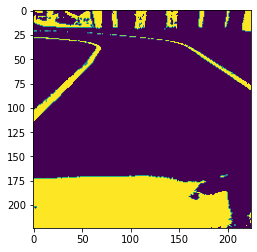

In [105]:
test_edge = detect_edges(frame)

In [108]:
def region_of_interest(edges):
    height, width = edges.shape
    mask = np.zeros_like(edges)

    # remove small rectangle at top
    polygon = np.array([[
        (0, height * 1 / 10),
        (width, height * 1 / 10),
        (width, height),
        (0, height),
    ]], np.int32)

    cv2.fillPoly(mask, polygon, 255)
    cropped_edges = cv2.bitwise_and(edges, mask)
    
    plt.imshow(cropped_edges)
    return cropped_edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

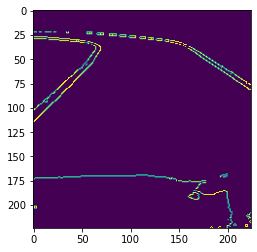

In [109]:
region_of_interest(test_edge)

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 2GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)
    

In [111]:
def detect_lane(frame):
    
    edges = detect_edges(frame)
    cropped_edges = region_of_interest(edges)
    line_segments = detect_line_segments(cropped_edges)
    lane_lines = average_slope_intercept(frame, line_segments)
    
    return lane_lines

In [112]:

def display_lines(frame, lines, line_color=(0, 255, 0), line_width=2):
    line_image = np.zeros_like(frame)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), line_color, line_width)
    line_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    return line_image

lane_lines_image = display_lines(frame, lane_lines)
cv2.imshow("lane lines", lane_lines_image)

NameError: name 'lane_lines' is not defined

In [ ]:
https://towardsdatascience.com/deeppicar-part-1-102e03c83f2c